             solar
date              
2020-12-06  1672.0
2020-12-07   -15.0
2020-12-08   -15.0
2020-12-09   -39.0
2020-12-10   -36.0
...            ...
2024-12-01   -44.0
2024-12-02   -15.0
2024-12-03   -49.0
2024-12-04   -39.0
2024-12-05   -47.0

[1461 rows x 1 columns]


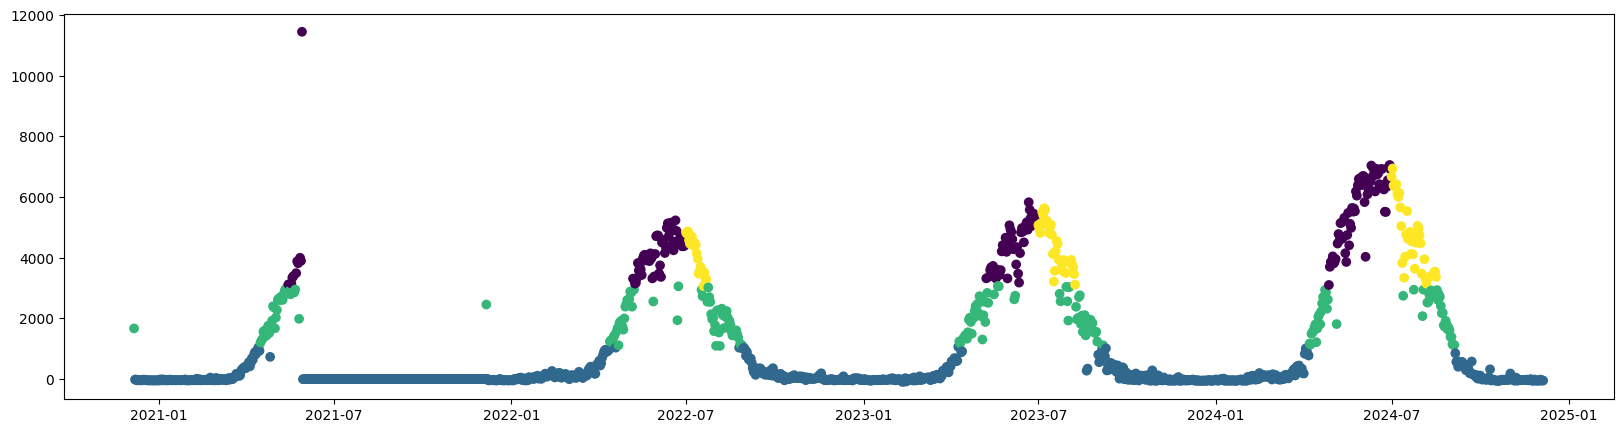

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from database_api import *


solar_data = getColumn('solar')

solar_data.fillna(0, inplace=True)
# Convert 'interval_start_utc' to a datetime format
solar_data['interval_start_utc'] = pd.to_datetime(solar_data['interval_start_utc'])

# Group by day and compute the median for each day and energy source
solar_data['date'] = solar_data['interval_start_utc'].dt.date
daily_data = solar_data.groupby('date').median()

cleaned_data = daily_data.filter(['date', 'solar'], axis=1)

cleaned_data.index = pd.to_datetime(cleaned_data.index)
cleaned_data['solar'] = pd.to_numeric(cleaned_data['solar'])

cleaned_data = cleaned_data.resample('d').median()
cleaned_data.fillna(0, inplace=True)

kmeans = KMeans(n_clusters=4)
kmeans.fit(cleaned_data)

def customize_k_means_label(kmean_label, half_year):
    if kmean_label == 3 and half_year == "H1":
        return 0
    elif kmean_label == 0 and half_year == "H2":
        return 3
    else:
        return kmean_label 

cleaned_data['solar'] = pd.to_numeric(cleaned_data['solar'], errors='coerce').fillna(0)
cleaned_data['date_time'] = pd.to_datetime(cleaned_data.index, dayfirst=True)
cleaned_data['half_year'] = np.where(cleaned_data['date_time'].dt.month.le(6), 'H1', 'H2')
cleaned_data['kmeans_label'] = kmeans.labels_
cleaned_data['customized_kmeans_labels'] = cleaned_data['kmeans_label']
cleaned_data['customized_kmeans_labels'] = cleaned_data[['kmeans_label', 'half_year']].apply(lambda x: customize_k_means_label(x['kmeans_label'], x['half_year']), axis=1)
plt.figure(figsize=(20,5))
plt.scatter(cleaned_data['date_time'], cleaned_data['solar'], c=cleaned_data['customized_kmeans_labels'])
